In [13]:
from bert_serving.client import BertClient
bc = BertClient()

In [19]:
words ='april march december january june love fantastic great like wonderful hate dumb idiot loser disgusting tree flower grass sky river green yellow black blue white three nine eight twelve twenty'

In [137]:
words2 = ['i did this in june', 'i did this in april', 'i did this in march', 'i made that in january',
          'i like the color green', 'i like the color yellow', 'i like the color black', 'i hate the color blue',
          'you are a big loser', 'you are a big idiot', 'you are very very disgusting', 'can you be more dumb',
          'you are very very wonderful', 'you are very very fantastic', 'you i really really like', 'this is very very great',
          'i did this with twelve', 'i made this with eight', ' i am now almost twenty', 'i have like maybe three']

In [131]:
targets2 = ['june', 'april', 'march', 'january', 'green', 'yellow', 'black', 'blue',
            'loser', 'idiot', 'disgusting', 'dumb', 'wonderful', 'fantastic', 'great', 'like', 'twelve', 'eight', 'twenty', 'three']

In [138]:
t2 = [s.split() for s in words2]

In [20]:
t = words.split()

In [21]:
from random import shuffle
shuffle(t)

In [22]:
t = [t]

In [40]:
t[0]

['like',
 'disgusting',
 'green',
 'three',
 'dumb',
 'grass',
 'blue',
 'great',
 'june',
 'march',
 'white',
 'fantastic',
 'idiot',
 'flower',
 'twenty',
 'nine',
 'december',
 'tree',
 'love',
 'april',
 'hate',
 'eight',
 'sky',
 'black',
 'wonderful',
 'yellow',
 'river',
 'loser',
 'january',
 'twelve']

**Encode words with (vecs2) and without (vecs) context.**

In [83]:
vecs = bc.encode(t, show_tokens=True, is_tokenized=True)

In [139]:
vecs2 = bc.encode(t2, show_tokens=True, is_tokenized=True)

In [140]:
l = list(vecs2[0])

In [141]:
vecs2[1]

[['[CLS]', 'i', 'did', 'this', 'in', 'june', '[SEP]'],
 ['[CLS]', 'i', 'did', 'this', 'in', 'april', '[SEP]'],
 ['[CLS]', 'i', 'did', 'this', 'in', 'march', '[SEP]'],
 ['[CLS]', 'i', 'made', 'that', 'in', 'january', '[SEP]'],
 ['[CLS]', 'i', 'like', 'the', 'color', 'green', '[SEP]'],
 ['[CLS]', 'i', 'like', 'the', 'color', 'yellow', '[SEP]'],
 ['[CLS]', 'i', 'like', 'the', 'color', 'black', '[SEP]'],
 ['[CLS]', 'i', 'hate', 'the', 'color', 'blue', '[SEP]'],
 ['[CLS]', 'you', 'are', 'a', 'big', 'loser', '[SEP]'],
 ['[CLS]', 'you', 'are', 'a', 'big', 'idiot', '[SEP]'],
 ['[CLS]', 'you', 'are', 'very', 'very', 'disgusting', '[SEP]'],
 ['[CLS]', 'can', 'you', 'be', 'more', 'dumb', '[SEP]'],
 ['[CLS]', 'you', 'are', 'very', 'very', 'wonderful', '[SEP]'],
 ['[CLS]', 'you', 'are', 'very', 'very', 'fantastic', '[SEP]'],
 ['[CLS]', 'you', 'i', 'really', 'really', 'like', '[SEP]'],
 ['[CLS]', 'this', 'is', 'very', 'very', 'great', '[SEP]'],
 ['[CLS]', 'i', 'did', 'this', 'with', 'twelve', '[SEP]

In [142]:
vec_list2 = []
for i,vec in enumerate(l):
    #print(i)
    vec_list2.append(list(vec[5]))

In [143]:
len(vec_list2)

20

In [113]:
vecs[1][0]

['[CLS]',
 'like',
 'disgusting',
 'green',
 'three',
 'dumb',
 'grass',
 'blue',
 'great',
 'june',
 'march',
 'white',
 'fantastic',
 'idiot',
 'flower',
 'twenty',
 'nine',
 'december',
 'tree',
 'love',
 'april',
 'hate',
 'eight',
 'sky',
 'black',
 'wonderful',
 'yellow',
 'river',
 'loser',
 'january',
 'twelve',
 '[SEP]']

In [101]:
v = list(vecs[0])

In [102]:
v

[array([[-0.18356124, -0.17384502,  0.4501494 , ..., -0.33554   ,
         -0.07352923,  0.14558466],
        [ 0.67606825,  1.1903994 ,  1.1681944 , ..., -0.4950658 ,
          0.24713813,  0.3724842 ],
        [ 1.2378294 ,  1.1281395 ,  0.43425074, ...,  0.9168096 ,
         -0.40286866, -0.5026688 ],
        ...,
        [-0.        ,  0.        ,  0.        , ..., -0.        ,
         -0.        ,  0.        ],
        [-0.        ,  0.        ,  0.        , ..., -0.        ,
         -0.        ,  0.        ],
        [-0.        , -0.        , -0.        , ..., -0.        ,
          0.        , -0.        ]], dtype=float32)]

In [106]:
vect_list = []
for vector in v:
    for i,vect in enumerate(vector):
        if i<32:
            vect_list.append(vect)

In [107]:
len(vect_list)

32

Plot the vectors. Either pass vect_list or vect_list2.

In [144]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(vec_list2)

In [145]:
y = []
x = []
for pc in principalComponents:
    y.append(pc[0])
    x.append(pc[1])

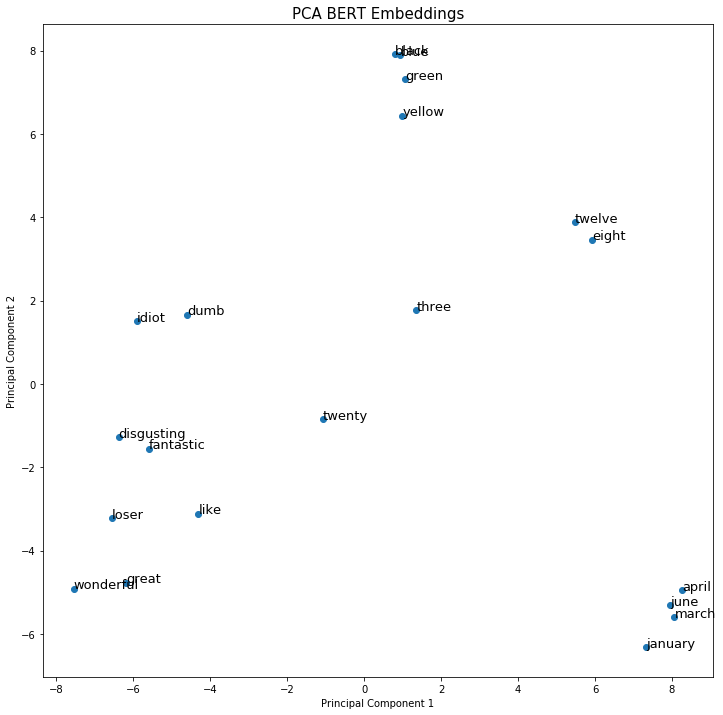

In [146]:
from adjustText import adjust_text
from matplotlib import pyplot as plt
% matplotlib inline

fig, ax = plt.subplots(figsize=(12,12))
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('PCA BERT Embeddings', fontsize = 15)
targets = targets2  #vecs[1][0]

ax.scatter(y,x)
#adjust_text(targets, only_move='y')
for i, txt in enumerate(targets):
    ax.annotate(txt, (y[i], x[i]), color='black', size=13.0)